# Merit Order

In [25]:
import pandas as pd
import matplotlib.patches as mpat
from matplotlib import pyplot as plt

## Task 2A

In [26]:
set1 = "https://tubcloud.tu-berlin.de/s/P9qPttqFg3ciKEy/download/powerplants.csv"
set2 = " https://tubcloud.tu-berlin.de/s/XjtnxyNPtPP6eDQ/download/technologies.csv"
plant_source = pd.read_csv(set1 , index_col=0)
tech_source  = pd.read_csv(set2)
tech_source = tech_source.rename({'Carrier': 'carrier'}, axis=1)
plant_source


,efficiency,marginal_cost,p_nom,carrier,p_max_pu
3371 biomass,0.470000,14.893617,20.569100,biomass,1.000000
3371 onwind,1.000000,2.000000,206.573309,onshore wind,0.085297
3371 ror,0.900000,3.000000,44.060000,run of river,0.660853
3371 solar,1.000000,1.000000,324.967191,solar,0.159534
3372 CCGT,0.586794,38.453915,1822.000000,CCGT,1.000000
...,...,...,...,...,...
4944 PHS,0.866025,4.000000,1060.000000,pumped hydro,1.000000
5883 PHS,0.866025,4.000000,120.000000,pumped hydro,1.000000
8121 PHS,0.866025,4.000000,7.420000,pumped hydro,1.000000
8414 PHS,0.866025,4.000000,480.000000,pumped hydro,1.000000


In [27]:
tech_source


,carrier,co2_emissions,color
0,onshore wind,0.00,#235ebc
1,solar,0.00,#f9d002
2,nuclear,0.00,#ff9000
3,biomass,0.00,#0c6013
4,CCGT,0.20,#b20101
5,OCGT,0.20,#d35050
6,offshore wind,0.00,#74c6f2
7,lignite,0.41,#9e5a01
8,oil,0.27,#262626
9,coal,0.34,#707070


## task 2b

In [28]:
def cum_set(mod_data):
   
    mod_data = mod_data.sort_values(by='marginal_cost').reset_index(drop=True)
    
    mod_data['Cumulative capacity (GW)'] = mod_data['Available capacity (GW)'].cumsum()
    
    mod_data = mod_data.sort_values(by='Cumulative capacity (GW)').reset_index(drop=True)

    mod_data['x_pos'] = 0.0

    for index, row in mod_data.iterrows():
        if index == 0:
            mod_data.at[index, 'x_pos'] = row['Available capacity (GW)'] / 2
        else:
            mod_data.at[index, 'x_pos'] = row['Available capacity (GW)'] / 2 + mod_data.at[index - 1, 'Cumulative capacity (GW)']

    return mod_data

In [29]:
def mo_cur(mod_data1, data_carr):
    plt.figure(figsize = (15, 10))
    plt.rcParams["font.size"] = 14

    mod_data2 = pd.merge(left=mod_data1, right=data_carr, on='carrier')
    mod_data2.to_csv('mergeddf.csv')


    xx= mod_data2["x_pos"].values.tolist()
    h = mod_data2["marginal_cost"].values.tolist()
    w = mod_data2["Available capacity (GW)"].values.tolist()
    colors = mod_data2["color"].tolist()

    fig = plt.bar(xx,
                  height = h,
                  width = w,
                  fill = True,
                  color = colors)

    plt.xlim(0, mod_data2["Available capacity (GW)"].sum())
    plt.ylim(0, mod_data2["marginal_cost"].max() + 5)

    colorlist = []
    for i in range(len(data_carr)):
        x = data_carr.iloc[i, 0]
        color = data_carr.iloc[i, 2]
        m = mpat.Patch(color=color, label=x)
        colorlist.append(m)

    plt.legend(fig.patches, handles=colorlist,loc = "best",ncol = 5)

    plt.xlabel("Power Plant Capacity (GW)")
    plt.ylabel("Marginal Cost (€/MWh)")
    plt.title("Merit order curve in the Germany day ahead electricity market")
    plt.tight_layout()
    plt.show()

## task 2c



In [30]:
# Task 2c (i)
cdata = plant_source.copy()
cdata['copy_index'] = cdata.index
cdata = pd.merge(left=cdata, right=tech_source, on='carrier')
cdata.set_index('copy_index', inplace=True)
cdata['Available capacity (GW)'] = (cdata['p_nom'] * cdata['p_max_pu']) / 1000
cdata.drop('color', axis=1, inplace=True)
cdata = cum_set(cdata)
cdata


,efficiency,marginal_cost,p_nom,carrier,p_max_pu,co2_emissions,Available capacity (GW),Cumulative capacity (GW),x_pos
0,1.0000,1.000000,28.048394,solar,0.375199,0.00,0.010524,0.010524,0.005262
1,1.0000,1.000000,724.116629,solar,0.138718,0.00,0.100448,0.110972,0.060748
2,1.0000,1.000000,414.188108,solar,0.103966,0.00,0.043061,0.154033,0.132502
3,1.0000,1.000000,62.272999,solar,0.178047,0.00,0.011088,0.165121,0.159577
4,1.0000,1.000000,696.497755,solar,0.035220,0.00,0.024531,0.189651,0.177386
...,...,...,...,...,...,...,...,...,...
1145,0.3795,137.752306,70.000000,oil,1.000000,0.27,0.070000,96.070676,96.035676
1146,0.3751,139.297787,0.500000,oil,1.000000,0.27,0.000500,96.071176,96.070926
1147,0.3722,140.395401,212.500000,oil,1.000000,0.27,0.212500,96.283676,96.177426
1148,0.3603,144.914764,35.400000,oil,1.000000,0.27,0.035400,96.319076,96.301376


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_20347/3121533247.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig.patches, handles=colorlist,loc = "best",ncol = 5)


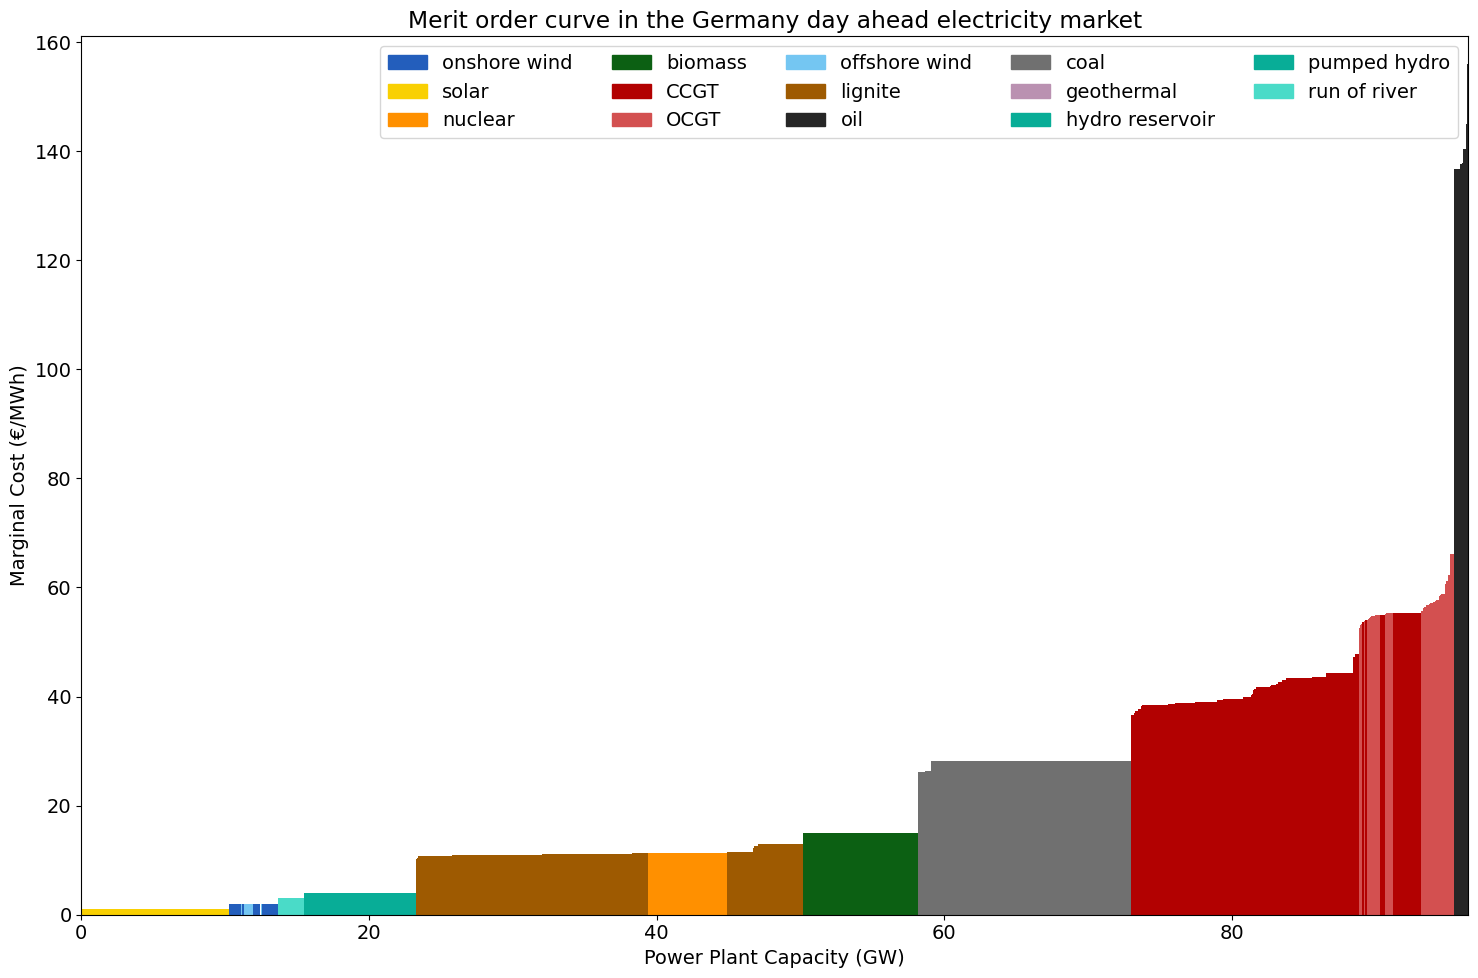

In [31]:
mo_cur(cdata, tech_source)

In [32]:
# Task 2c (ii) 

cdata1 = cdata.copy()
cdata1 = cdata1.drop(['Cumulative capacity (GW)', 'x_pos'], axis=1)
cdata1 = cdata1.rename(columns={'marginal_cost': 'old_marginal_cost'})
cdata1["marginal_cost"] = cdata1['old_marginal_cost'] + ((70 * cdata1['co2_emissions']) / cdata1['efficiency'])
cdata1 = cum_set(cdata1)
cdata1


,efficiency,old_marginal_cost,p_nom,carrier,p_max_pu,co2_emissions,Available capacity (GW),marginal_cost,Cumulative capacity (GW),x_pos
0,1.0000,1.000000,28.048394,solar,0.375199,0.00,0.010524,1.000000,0.010524,0.005262
1,1.0000,1.000000,176.403039,solar,0.485712,0.00,0.085681,1.000000,0.096205,0.053364
2,1.0000,1.000000,59.265794,solar,0.575335,0.00,0.034098,1.000000,0.130302,0.113254
3,1.0000,1.000000,325.226804,solar,0.310017,0.00,0.100826,1.000000,0.231128,0.180715
4,1.0000,1.000000,96.122585,solar,0.507062,0.00,0.048740,1.000000,0.279868,0.255498
...,...,...,...,...,...,...,...,...,...,...
1145,0.3795,137.752306,70.000000,oil,1.000000,0.27,0.070000,187.554677,96.070676,96.035676
1146,0.3751,139.297787,0.500000,oil,1.000000,0.27,0.000500,189.684351,96.071176,96.070926
1147,0.3722,140.395401,212.500000,oil,1.000000,0.27,0.212500,191.174552,96.283676,96.177426
1148,0.3603,144.914764,35.400000,oil,1.000000,0.27,0.035400,197.371050,96.319076,96.301376


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_20347/3121533247.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig.patches, handles=colorlist,loc = "best",ncol = 5)


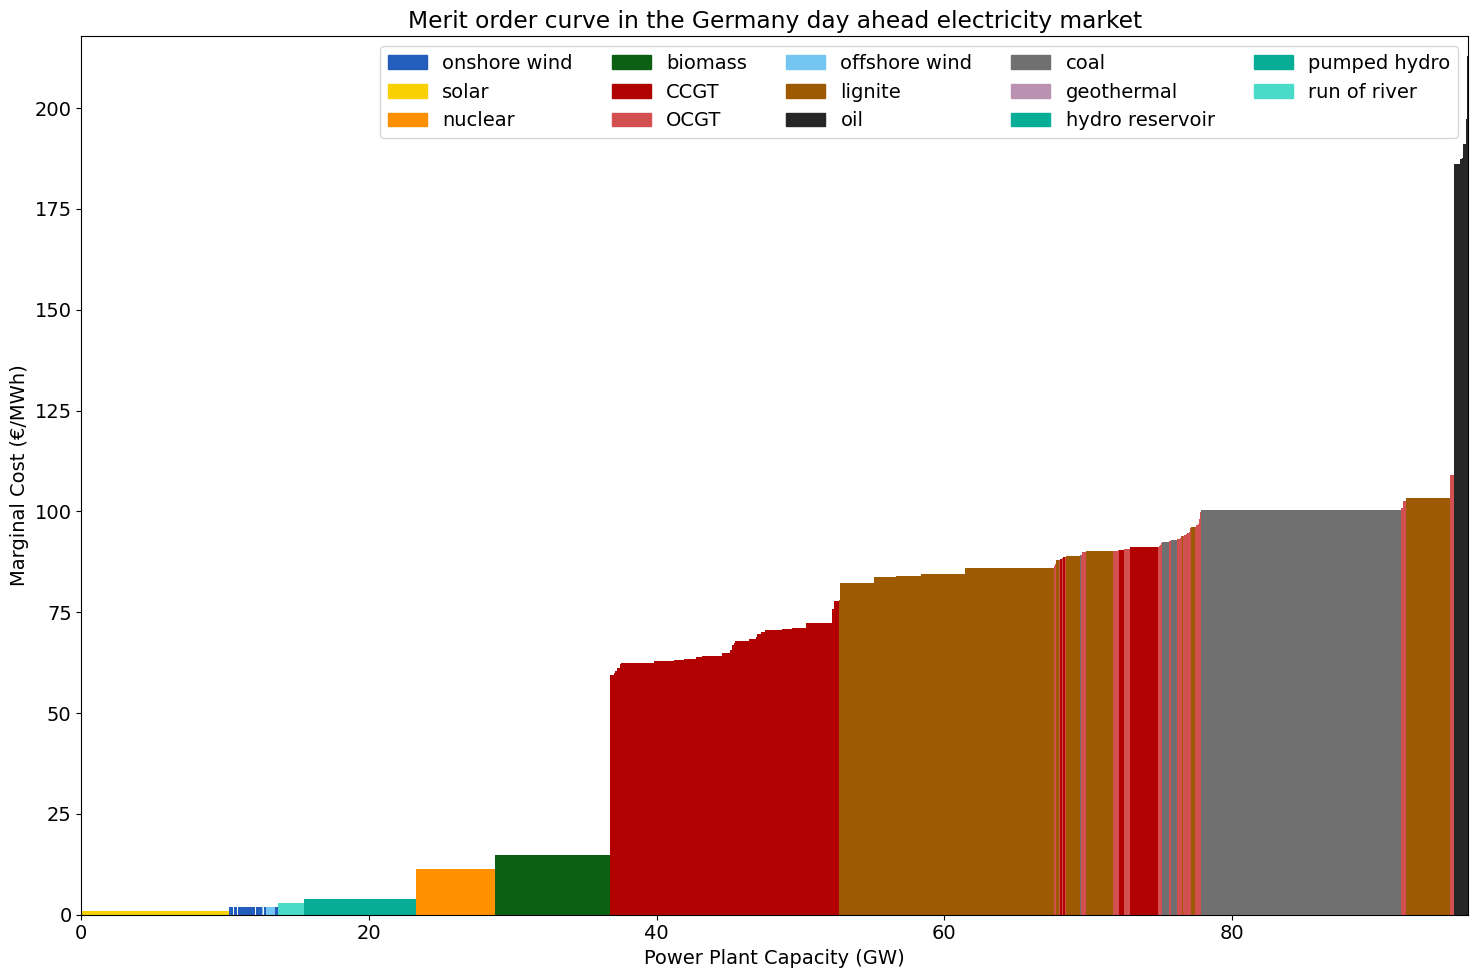

In [33]:
mo_cur(cdata1,tech_source)

In [34]:
cdata2= cdata1.copy()
cdata2 = cdata2.drop(['old_marginal_cost', 'Cumulative capacity (GW)', 'x_pos'], axis=1)
cdata2 = cdata2.rename(columns={'marginal_cost': 'old_marginal_cost'})
cdata2['Fuel Price'] = 0
cdata2.loc[cdata2.carrier.isin(['CCGT', 'OCGT']), 'Fuel Price'] = 50
cdata2['marginal_cost'] = (cdata2['Fuel Price'] / cdata2['efficiency']) + cdata2['old_marginal_cost']
cdata2 = cum_set(cdata2)
cdata2.head()

,efficiency,p_nom,carrier,p_max_pu,co2_emissions,Available capacity (GW),old_marginal_cost,Fuel Price,marginal_cost,Cumulative capacity (GW),x_pos
0,1.0,28.048394,solar,0.375199,0.0,0.010524,1.0,0,1.0,0.010524,0.005262
1,1.0,724.116629,solar,0.138718,0.0,0.100448,1.0,0,1.0,0.110972,0.060748
2,1.0,414.188108,solar,0.103966,0.0,0.043061,1.0,0,1.0,0.154033,0.132502
3,1.0,62.272999,solar,0.178047,0.0,0.011088,1.0,0,1.0,0.165121,0.159577
4,1.0,696.497755,solar,0.035220,0.0,0.024531,1.0,0,1.0,0.189651,0.177386


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_20347/3121533247.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig.patches, handles=colorlist,loc = "best",ncol = 5)


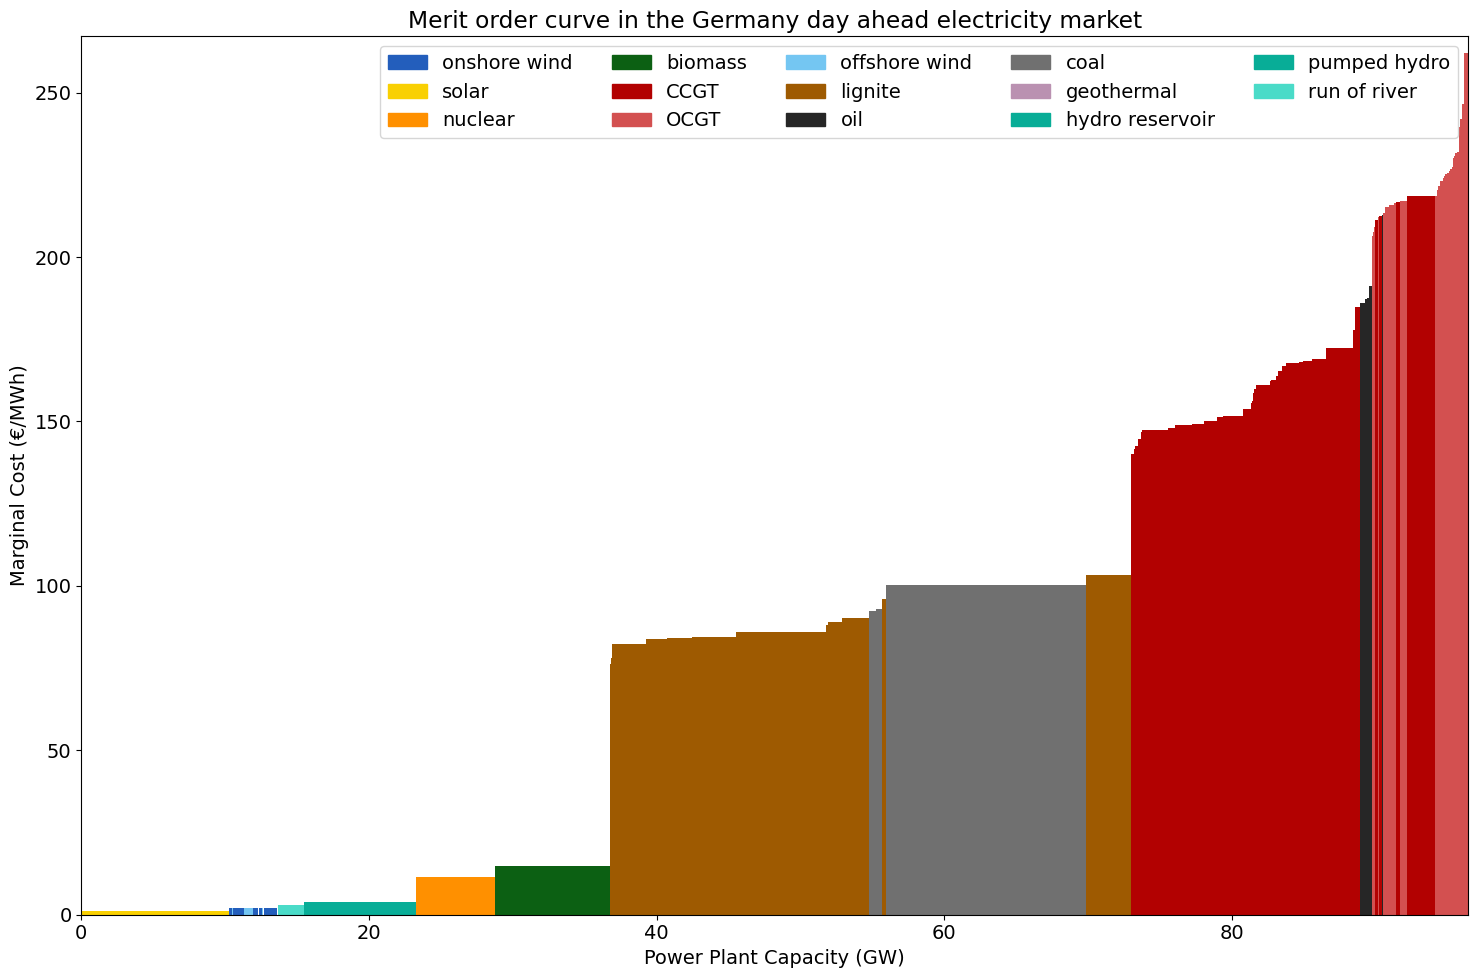

In [36]:
mo_cur(cdata2, tech_source)

# task 2d

In [46]:
def cut_off(plant_source):
    dmnd = 69  # GW
    plant_source = plant_source.sort_values(by='marginal_cost').reset_index(drop=True)
    plant_source['Cumulative capacity (GW)'] = plant_source['Available capacity (GW)'].cumsum()

    for index, row in plant_source.iterrows():
        if row['Cumulative capacity (GW)'] >= dmnd:
            cut_offpp = index
            plant_source = plant_source.loc[:cut_offpp].copy()
            cut_off_carr = plant_source.loc[cut_offpp, 'carrier']
            mcp = plant_source.loc[cut_offpp ,'marginal_cost']

            plant_source.loc[:, 'revenue'] = plant_source['Available capacity (GW)'] * 1000 * mcp
            plant_source.loc[:, 'costs'] = plant_source['marginal_cost'] * plant_source['Available capacity (GW)'] * 1000
            plant_source.loc[:, 'profit'] = plant_source['revenue'] - plant_source['costs']
            plant_source.loc[:, 'carbon_intensity'] = (plant_source['co2_emissions'] * plant_source['Available capacity (GW)'] / plant_source['efficiency']) * 1000
            carbon_sum = plant_source['carbon_intensity'].sum() / dmnd
            
            data = plant_source.groupby(['carrier']).agg(
                Power_Dispatched_GW=('Available capacity (GW)', 'sum'),
                Revenue_Euros=('revenue', 'sum'),
                Cost_Euros=('costs', 'sum'),
                Profit_Euros=('profit', 'sum'),
            )
            data = data.sort_values(by='Power_Dispatched_GW', ascending=False)

            print(f'Clearing price is {mcp:.2f} €/MWh.')
            print(f'Carrier is {cut_off_carr}')
            print(f'Carbon intensity for this system is {carbon_sum:.2f} g/kWh')
            break

    return data

In [47]:
cut_off(cdata)

Clearing price is 28.20 €/MWh.
Carrier is coal
Carbon intensity for this system is 503.39 g/kWh


,Power_Dispatched_GW,Revenue_Euros,Cost_Euros,Profit_Euros
carrier,,,,
lignite,21.375403,602721.598180,242876.813699,359844.784481
coal,11.028581,310972.570032,309131.486895,1841.083137
solar,10.266929,289496.280495,10266.928809,279229.351687
biomass,8.004648,225706.812185,119218.159111,106488.653074
pumped hydro,7.659620,215978.073030,30638.480000,185339.593030
nuclear,5.468000,154181.030303,62219.212121,91961.818182
onshore wind,2.561602,72229.424355,5123.204737,67106.219618
run of river,1.777275,50113.779314,5331.826064,44781.953251
offshore wind,0.861509,24291.946369,1723.018227,22568.928142


In [48]:
cut_off(cdata1)

Clearing price is 88.93 €/MWh.
Carrier is lignite
Carbon intensity for this system is 335.24 g/kWh


,Power_Dispatched_GW,Revenue_Euros,Cost_Euros,Profit_Euros
carrier,,,,
CCGT,16.199029,1.440568e+06,1.086492e+06,354076.579795
lignite,16.108014,1.432475e+06,1.366960e+06,65514.653977
solar,10.266929,9.130308e+05,1.026693e+04,902763.906055
biomass,8.004648,7.118478e+05,1.192182e+05,592629.602148
pumped hydro,7.659620,6.811647e+05,3.063848e+04,650526.196775
nuclear,5.468000,4.862654e+05,6.221921e+04,424046.223058
onshore wind,2.561602,2.278015e+05,5.123205e+03,222678.311427
run of river,1.777275,1.580519e+05,5.331826e+03,152720.034525
offshore wind,0.861509,7.661341e+04,1.723018e+03,74890.387775


In [49]:
cut_off(cdata2)

Clearing price is 100.32 €/MWh.
Carrier is coal
Carbon intensity for this system is 490.30 g/kWh


,Power_Dispatched_GW,Revenue_Euros,Cost_Euros,Profit_Euros
carrier,,,,
lignite,18.265948,1.832407e+06,1.563434e+06,2.689729e+05
coal,14.041471,1.408615e+06,1.401230e+06,7.384855e+03
solar,10.266929,1.029960e+06,1.026693e+04,1.019693e+06
biomass,8.004648,8.030117e+05,1.192182e+05,6.837936e+05
pumped hydro,7.659620,7.683992e+05,3.063848e+04,7.377607e+05
nuclear,5.468000,5.485398e+05,6.221921e+04,4.863206e+05
onshore wind,2.561602,2.569753e+05,5.123205e+03,2.518521e+05
run of river,1.777275,1.782930e+05,5.331826e+03,1.729612e+05
offshore wind,0.861509,8.642503e+04,1.723018e+03,8.470201e+04


#### 1)given marginal cost in the table and our calculated values inform that we can achive the demand with low marginal cost that would lead tto the lwo market clearing price, and data regarding to the carbon intensisty is very high.

##### 2) in second case we hac carbon price of 70 €/tCO2, market clearing price is highdue to the additional carbon price  that is accounted for carbon emission.carbon intensity reduced with respect to other cases.

##### 3)In the third scenario, we maintain the carbon price from the previous case while also incorporating an increased gas price of 69 €/MWhth. This adjustment results in significantly higher marginal costs for Combined Cycle Gas Turbines (CCGT) and Open Cycle Gas Turbines (OCGT), as evident in the graph above. To meet the demand, these more expensive gas-fired plants must be utilized, driving up the market clearing price. Consequently, there's a shift towards greater use of lignite-fired plants, which leads to an increase in the overall carbon intensity of the electricity system.

In [74]:
import pyomo.environ as pe
import pandas as pd
import pypsa as pypsa
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [75]:
# To create the dictionary for the power plants, Marginal costs, Demand, and Transmission Capacities

power_plants = {
    "AL": {"Coal": 51000, "Wind&Solar": 9000, "Gas": 12500},
    "BR": {"Gas": 1000, "Hydro": 2100},
    "CO": {"Hydro": 1400}
}

marginal_cost = {
    "AL": {"Coal": 34, "Wind&Solar": 0, "Gas": 75, "Hydro": 0},
    "BR": {"Coal": 0, "Wind&Solar": 0, "Gas": 75, "Hydro": 5},
    "CO": {"Coal": 0, "Wind&Solar": 0, "Gas": 0, "Hydro": 8}
}

Demands = {
    "AL": 64000,
    "BR": 1200,
    "CO": 800
}

transmission_cap = {
    "AL-BR": 600,
    "BR-CO": 50,
    "AL-CO": 200
}
technologies = ['Coal', 'Wind&Solar', 'Gas', 'Hydro']